In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

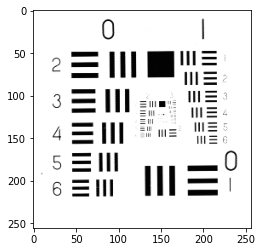

In [8]:
img = cv2.imread('final_test.tiff', 0)
plt.imshow(img, cmap='gray');
plt.imsave('final_test.png', img, cmap='gray')

# Custom Class for First Order Derivative Prewitt filter

In [9]:
class FirstOrderDerivative_PrewittFilter(object):
    ''' 
    Class for First Order Derivative Filter 
    Type of First Order Derivative Filter used: Prewitt's Operator
    '''
    def __init__(self) -> None:
        ''' Prewitt's Gradient Filters '''
        self.Gx = np.array([[+1, +1, +1], 
                            [ 0,  0,  0],
                            [-1, -1, -1]])
        self.Gy = np.array([[-1,  0,  +1], 
                            [-1,  0,  +1],
                            [-1,  0,  +1]])
    
    def sharpen(self, image: np.ndarray) -> np.ndarray:
        '''
        Sharpen the Image using First Order Derivative Filter.
        Using a Window of size 3x3, as given by filter mask. 
        '''
        prewitt_x = np.zeros(shape=image.shape)
        prewitt_y = np.zeros(shape=image.shape)
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                row_start, row_end = max(0, i - 1), i + 2
                col_start, col_end = max(0, j - 1), j + 2 
                
                GX = self.Gx[int(i==0) : 3 - int(i==image.shape[0]-1), int(j==0) : 3 - int(j==image.shape[1]-1)]
                GY = self.Gy[int(i==0) : 3 - int(i==image.shape[0]-1), int(j==0) : 3 - int(j==image.shape[1]-1)]
                
                prewitt_x[i, j] = np.sum(image[row_start:row_end, col_start:col_end] * GX)
                prewitt_y[i, j] = np.sum(image[row_start:row_end, col_start:col_end] * GY)
        
        return prewitt_x, prewitt_y, np.abs(prewitt_x) + np.abs(prewitt_y)

# 1st-Order Derivative Filter (using Prewitt's Gradient)


X-Gradient, Y-Gradients and Edge Mask


In [10]:
prewitt_X, prewitt_Y, prewitt_edge_mask = FirstOrderDerivative_PrewittFilter().sharpen(img)

plt.imsave('prewitt_X.png', prewitt_X, cmap='gray')
plt.imsave('prewitt_Y.png', prewitt_Y, cmap='gray')
plt.imsave('prewitt_edge_mask.png', prewitt_edge_mask, cmap='gray')

Sharp Image


In [ ]:
prewitt_sharp_img = img + prewitt_edge_mask/25
plt.imsave('prewitt_sharp_image.png', prewitt_sharp_img,     cmap='gray')

# 1st Order Prewitt using Correlation function

In [ ]:
Gx = np.array([ [+1, +1, +1], 
                [ 0,  0,  0],
                [-1, -1, -1]])
Gy = np.array([ [-1,  0,  +1], 
                [-1,  0,  +1],
                [-1,  0,  +1]])


prewitt_X_cv = cv2.filter2D(src=img, ddepth=-1, kernel=Gx)
prewitt_Y_cv = cv2.filter2D(src=img, ddepth=-1, kernel=Gy)
prewitt_edge_mask_cv = np.abs(prewitt_X_cv) + np.abs(prewitt_Y_cv)
prewitt_sharp_img_cv = img + prewitt_edge_mask_cv/25

plt.imsave('prewitt_X_cv.png', prewitt_X_cv, cmap='gray')
plt.imsave('prewitt_Y_cv.png', prewitt_Y_cv, cmap='gray')
plt.imsave('prewitt_edge_mask_cv.png', prewitt_edge_mask_cv, cmap='gray')
plt.imsave('prewitt_sharp_image_cv.png', prewitt_sharp_img_cv, cmap='gray')